In [29]:
import numpy as np
import pandas as pd

In [30]:
import matplotlib.pyplot as plt
import math

In [31]:
df = pd.read_csv("linear_regression_dataset.csv")
df

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [32]:
df.describe()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
count,500.000000,500.000000,500.000000,499.000000,500.000000,500.000000
mean,5.086000,0.512000,2.828000,1.078156,2774.388000,616.360000
std,6.949474,0.500357,3.363487,0.514746,3888.407367,178.316044
min,0.000000,0.000000,0.000000,1.000000,532.000000,21.000000
25%,0.000000,0.000000,2.000000,1.000000,1216.250000,640.000000
50%,0.000000,1.000000,2.000000,1.000000,1536.500000,640.000000
75%,13.000000,1.000000,3.000000,1.000000,2530.250000,751.000000
max,17.000000,1.000000,41.000000,6.000000,48388.000000,952.000000


In [33]:
df = df.dropna(subset=["RACE"])
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = pd.to_numeric(df[c], errors='coerce')


In [34]:
df=pd.get_dummies(df,columns=["RACE","APRDRG"],drop_first = True)

In [35]:
y = df["TOTCHG"]

In [36]:
x = df.drop(columns="TOTCHG")

In [37]:
m = x.shape[0]
n = x.shape[1]

Text(0, 0.5, 'TOTCHG')

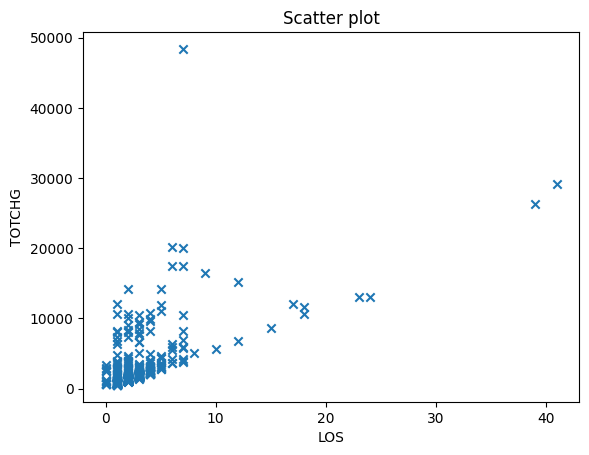

In [38]:
plt.scatter(x["LOS"],y,marker='x')
plt.title("Scatter plot")
plt.xlabel("LOS")
plt.ylabel("TOTCHG")

Text(0, 0.5, 'TOTCHG')

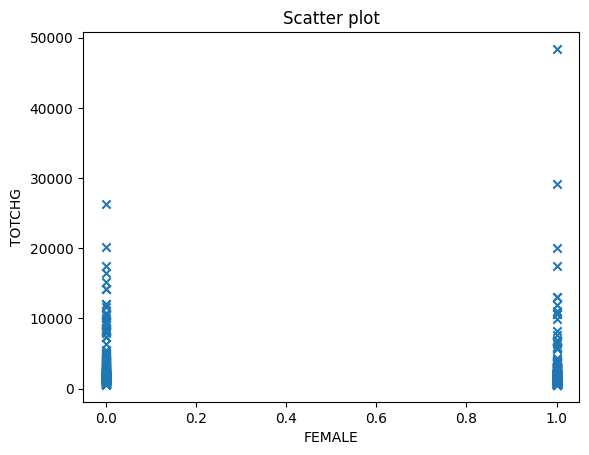

In [39]:
plt.scatter(x["FEMALE"],y,marker='x')
plt.title("Scatter plot")
plt.xlabel("FEMALE")
plt.ylabel("TOTCHG")

Text(0, 0.5, 'TOTCHG')

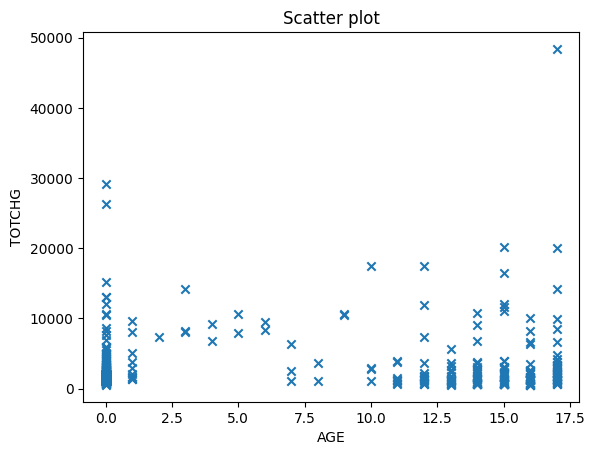

In [40]:
plt.scatter(x["AGE"],y,marker='x')
plt.title("Scatter plot")
plt.xlabel("AGE")
plt.ylabel("TOTCHG")

In [41]:
train_size = int(0.8 * m)
m = x.shape[0]
np.random.seed(42)
idx = np.random.permutation(m)
train_idx = idx[:train_size]
test_idx  = idx[train_size:]

X_train = x.iloc[train_idx]
y_train = y.iloc[train_idx]

X_test  = x.iloc[test_idx]
y_test  = y.iloc[test_idx]


X_train = X_train.values.astype(float)
X_test  = X_test.values.astype(float)
y_train = y_train.values.astype(float)
y_test  = y_test.values.astype(float)

In [42]:
X_mean = X_train.mean(axis=0)
X_std  = X_train.std(axis=0)
X_std[X_std == 0] = 1

X_train = (X_train - X_mean) / X_std
X_test  = (X_test  - X_mean) / X_std

In [47]:
def predict_row(x_row, w, b):
    pred = 0.0
    for j in range(len(w)):
        pred += w[j] * x_row[j]
    pred += b
    return pred


In [48]:
def compute_cost(X_arr, y_arr, w, b):
    m = X_arr.shape[0]
    cost = 0.0

    for i in range(m):
        f_wb = predict_row(X_arr[i], w, b)
        cost += (f_wb - y_arr[i]) ** 2

    return cost / (2 * m)

In [49]:
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [57]:
def gradient_descent(X_arr, y_arr, w_init, b_init, alpha, iters):
    w = w_init.copy()
    b = b_init
    m = X_arr.shape[0]
    cost_history = []
    for it in range(iters):
        dj_dw = [0.0] * len(w)
        dj_db = 0.0
        for i in range(m):
            pred_i = predict_row(X_arr[i], w, b)
            f = pred_i - y_arr[i]
            dj_db += f
            for j in range(len(w)):
                dj_dw[j] += f * X_arr[i, j]
        
        for j in range(len(w)):
            dj_dw[j] = dj_dw[j] / m
        dj_db =dj_db/ m
        
        for j in range(len(w)):
            w[j] = w[j] - alpha * dj_dw[j]
        b = b - alpha * dj_db
        
        if it % 200 == 0:
            cost = compute_cost(X_arr, y_arr, w, b)
            cost_history.append(cost)
            print(f"iter {it:5d} | cost {cost:.4f}")
    return w, b, cost_history

w0 = np.zeros(n)
b0 = 0.0
alpha = 0.03
iters = 2000

w_final, b_final, cost_hist = gradient_descent(X_train, y_train, w0, b0, alpha, iters)


iter     0 | cost 10747310.4699
iter   200 | cost 304926.7520
iter   400 | cost 287540.6903
iter   600 | cost 282545.3960
iter   800 | cost 280086.8813
iter  1000 | cost 278375.0205
iter  1200 | cost 277007.3204
iter  1400 | cost 275849.6307
iter  1600 | cost 274835.0546
iter  1800 | cost 273922.5028


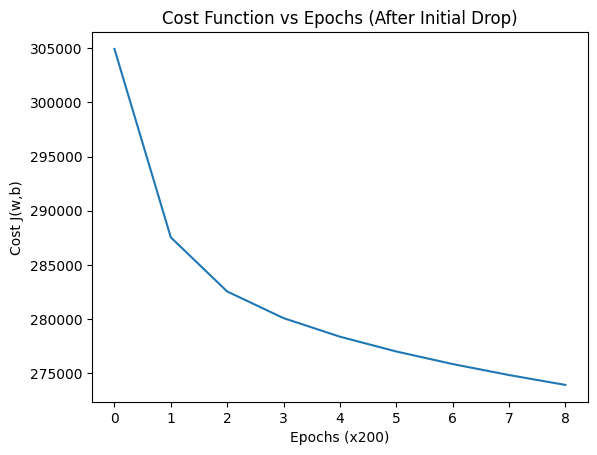

In [63]:
plt.plot(cost_hist[1:])
plt.xlabel("Epochs (x200)")
plt.ylabel("Cost J(w,b)")
plt.title("Cost Function vs Epochs (After Initial Drop)")
plt.show()

In [51]:
def rmse_and_r2(X_arr, y_arr, w, b):
    m_local = len(y_arr)
    se = 0.0
    ss_tot = 0.0
    mean_y = sum(y_arr) / m_local
    preds = []
    for i in range(m_local):
        p = predict_row(X_arr[i], w, b)
        preds.append(p)
        se += (y_arr[i] - p)**2
        ss_tot += (y_arr[i] - mean_y)**2
    rmse = math.sqrt(se / m_local)
    r2 = 1 - se / ss_tot if ss_tot != 0 else 0.0
    return rmse, r2, np.array(preds)

train_rmse, train_r2, train_preds = rmse_and_r2(X_train, y_train, w_final, b_final)
test_rmse, test_r2, test_preds = rmse_and_r2(X_test, y_test, w_final, b_final)

print(f"\nTrain RMSE: {train_rmse:.4f}, Train R2: {train_r2:.4f}")
print(f"Test  RMSE: {test_rmse:.4f}, Test  R2: {test_r2:.4f}")


Train RMSE: 739.0385, Train R2: 0.9649
Test  RMSE: 1351.5737, Test  R2: 0.8632


In [52]:
print("X_train mean (first 3):", X_train.mean(axis=0)[:3])
print("X_test  mean (first 3):", X_test.mean(axis=0)[:3])

X_train mean (first 3): [0.00000000e+00 2.22601108e-17 8.45884209e-17]
X_test  mean (first 3): [ 0.08211348 -0.07764888  0.13150825]


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred  = lr.predict(X_test)

train_rmse_skl = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_skl  = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2_skl = r2_score(y_train, y_train_pred)
test_r2_skl  = r2_score(y_test, y_test_pred)

print("SKLEARN RESULTS")
print("Train RMSE:", train_rmse_skl, "Train R2:", train_r2_skl)
print("Test  RMSE:", test_rmse_skl,  "Test  R2:", test_r2_skl)


SKLEARN RESULTS
Train RMSE: 704.235229827448 Train R2: 0.9681136211709098
Test  RMSE: 1607.0643814759208 Test  R2: 0.8065529578309587
